In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm

In [6]:
data = pd.read_csv("dataset/datasetFinalTesisCaliCauca.csv")

In [1]:
#data.describe()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

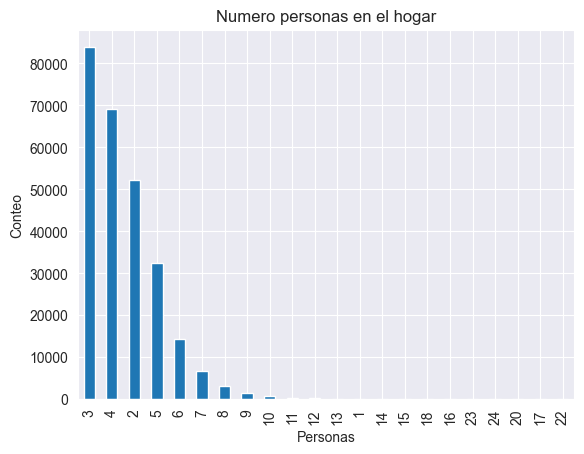

In [7]:
data['num_personas_hogar'].value_counts().plot(kind='bar')
plt.title('Numero personas en el hogar')
plt.xlabel('Personas')
plt.ylabel('Conteo')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

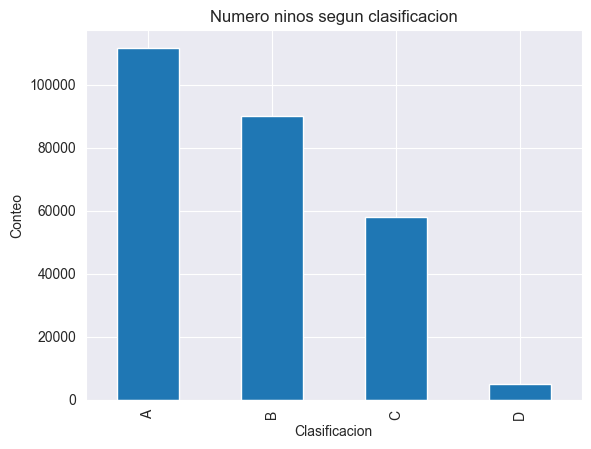

In [9]:
data['clasificacion_letter'].value_counts().plot(kind='bar')
plt.title('Numero ninos segun clasificacion')
plt.xlabel('Clasificacion')
plt.ylabel('Conteo')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

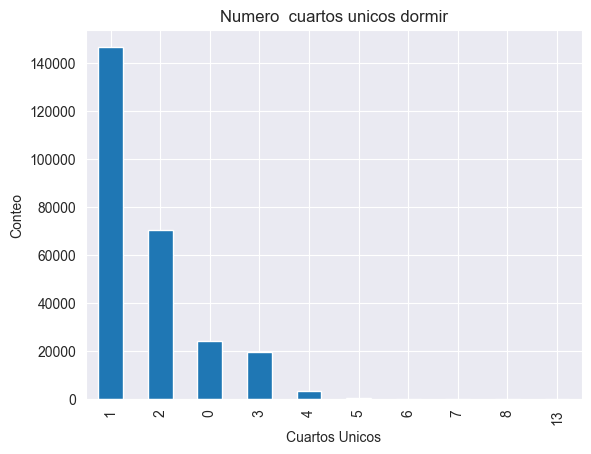

In [10]:
data['num_cuartos_unicos_dormir'].value_counts().plot(kind='bar')
plt.title('Numero  cuartos unicos dormir')
plt.xlabel('Cuartos Unicos')
plt.ylabel('Conteo')
sns.despine


Text(0.5, 1.0, 'sum_gastos_hogar vs Clasificacion')

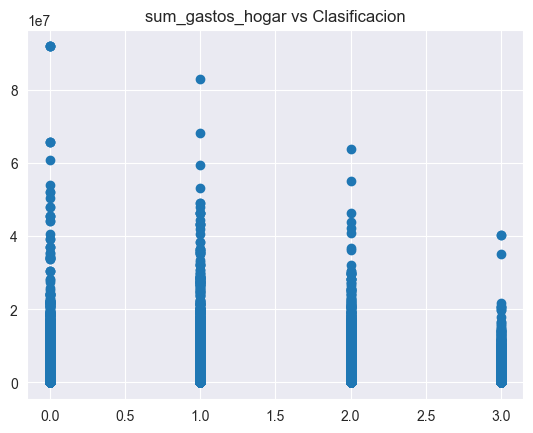

In [14]:
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

data['clasificacion_letter_numeric'] = data['clasificacion_letter'].map(label_mapping)

plt.scatter(data.clasificacion_letter_numeric,data.sum_gastos_hogar)
plt.title("sum_gastos_hogar vs Clasificacion")

Text(0.5, 1.0, 'sum_gastos_hogar vs Clasificacion')

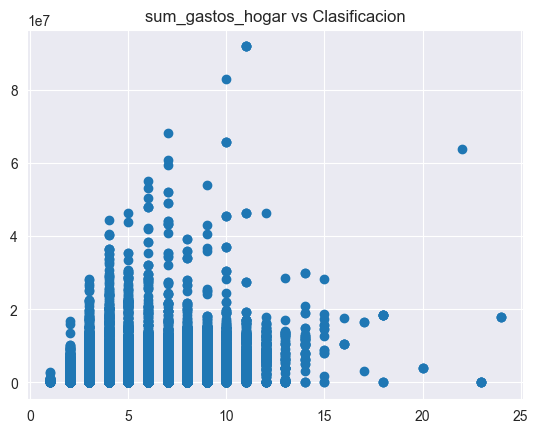

In [15]:
plt.scatter(data.num_personas_hogar,data.sum_gastos_hogar)
plt.title("sum_gastos_hogar vs Clasificacion")

In [17]:
if data['clasificacion_letter'].dtype == 'object':
    data['clasificacion_letter_cate'] = data['clasificacion_letter'].astype('category').cat.codes

<Axes: >

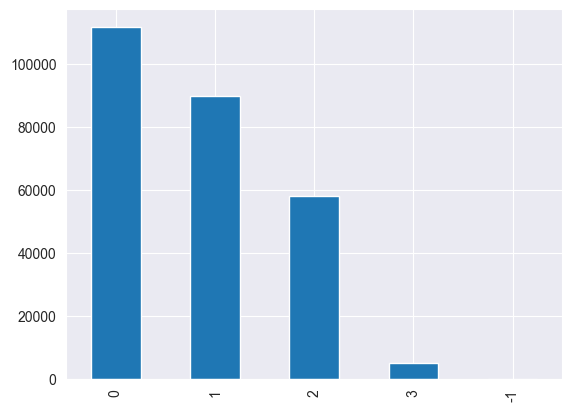

In [18]:
data['clasificacion_letter_cate'].value_counts().plot(kind='bar')

Matriz de Correlación:
                                  sum_gastos_hogar  \
sum_gastos_hogar                          1.000000   
max_nivel_educativo_en_hogar              0.151282   
alguien_hogar_empleado_o_similar          0.292638   
tot_hogares                              -0.098390   
num_cuartos_vivienda                      0.270021   
ind_tiene_energia                        -0.151840   
ind_tiene_alcantarillado                 -0.247196   
ind_tiene_gas                            -0.282686   
ind_tiene_acueducto                      -0.229032   
clasificacion_letter_cate                 0.177611   
cod_mpio                                  0.160707   
num_personas_hogar                        0.498893   

                                  max_nivel_educativo_en_hogar  \
sum_gastos_hogar                                      0.151282   
max_nivel_educativo_en_hogar                          1.000000   
alguien_hogar_empleado_o_similar                      0.227704   
tot_hogare

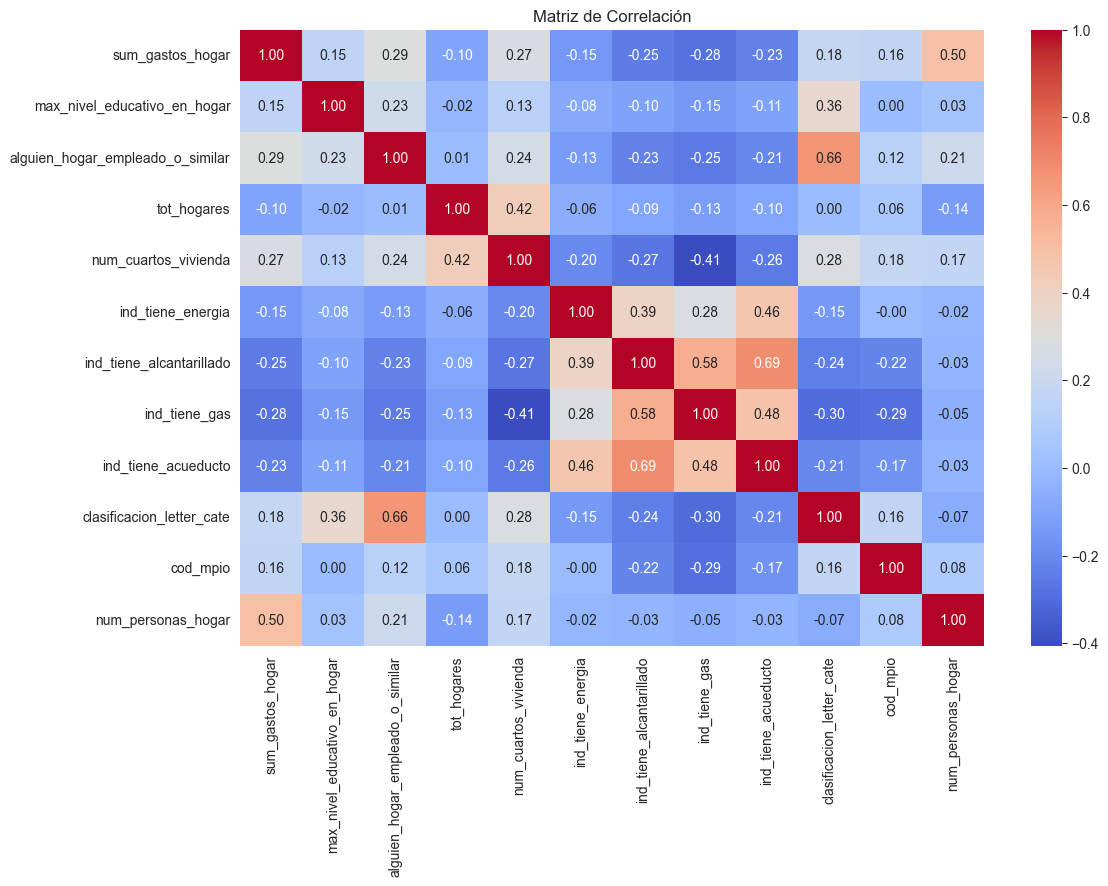

In [35]:
selected_features = [
    'sum_gastos_hogar', 'max_nivel_educativo_en_hogar',
    'alguien_hogar_empleado_o_similar', 'tot_hogares', 'num_cuartos_vivienda',
    'ind_tiene_energia', 'ind_tiene_alcantarillado', 'ind_tiene_gas', 'ind_tiene_acueducto',
    'clasificacion_letter_cate', 'cod_mpio' , 'num_personas_hogar'
]

data_correlation = data[selected_features]

correlation_matrix = data_correlation.corr()

print("Matriz de Correlación:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Coeficiente de correlación entre 'sum_gastos_hogar' y 'clasificacion_letter': 0.18
Valor p: 0.0000


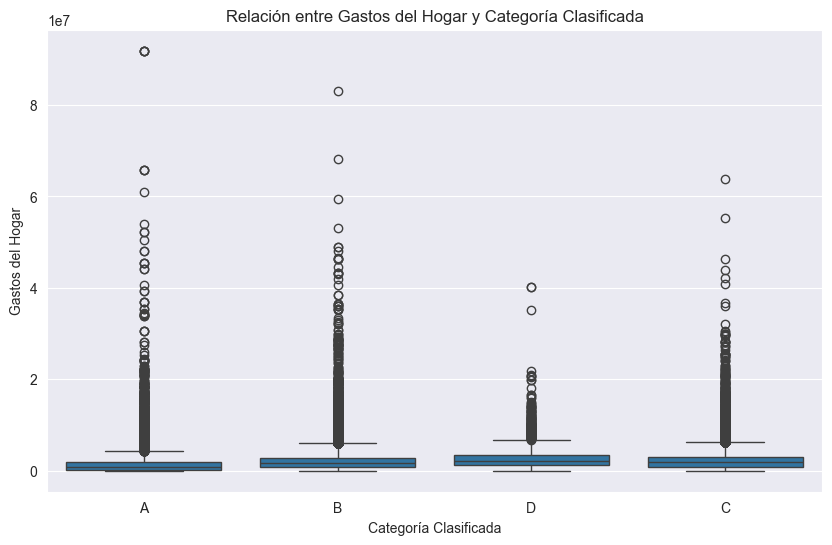

In [24]:
corr, p_value = pearsonr(data_correlation['sum_gastos_hogar'], data_correlation['clasificacion_letter_cate'])
print(f"Coeficiente de correlación entre 'sum_gastos_hogar' y 'clasificacion_letter': {corr:.2f}")
print(f"Valor p: {p_value:.4f}")

# Visualizar la relación entre 'sum_gastos_hogar' y 'clasificacion_letter'
plt.figure(figsize=(10, 6))
sns.boxplot(x='clasificacion_letter', y='sum_gastos_hogar', data=data)
plt.title('Relación entre Gastos del Hogar y Categoría Clasificada')
plt.xlabel('Categoría Clasificada')
plt.ylabel('Gastos del Hogar')
plt.show()

In [28]:
X = data_correlation[['clasificacion_letter_cate']]
y = data_correlation['sum_gastos_hogar']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_gastos_hogar   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8624.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:05:29   Log-Likelihood:            -4.2273e+06
No. Observations:              264762   AIC:                         8.455e+06
Df Residuals:                  264760   BIC:                         8.455e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

El modelo de regresión lineal aplicado para analizar la relación entre los gastos del hogar (sum_gastos_hogar) y la categoría clasificada (clasificacion_letter_cate) proporciona varios resultados importantes que debemos considerar.

Resumen de Resultados
Coeficiente de Determinación (R-cuadrado):

R-cuadrado: 0.032: Este valor indica que solo el 3.2% de la variabilidad en los gastos del hogar puede ser explicada por la categoría clasificada. Esto sugiere que la relación entre estas variables es débil y que otros factores no incluidos en este modelo probablemente tienen una influencia mayor en los gastos del hogar.

Significancia Estadística:

Prob (F-statistic): 0.00: El valor p extremadamente bajo sugiere que el modelo en su conjunto es significativo, es decir, hay una relación estadísticamente significativa entre los gastos del hogar y la categoría clasificada.
P-valor del coeficiente de clasificacion_letter_cate: 0.000: El coeficiente de la variable clasificacion_letter_cate es altamente significativo, lo que confirma que la categoría clasificada tiene un efecto sobre los gastos del hogar.

Coeficientes del Modelo:

Intercepto (const): 1.452e+06: Este es el valor esperado de los gastos del hogar cuando la categoría clasificada es cero (considerando cómo se codifican las categorías).
Coeficiente de clasificacion_letter_cate: 4.516e+05: Esto indica que, en promedio, un cambio unitario en la categoría clasificada se asocia con un aumento de 451,600 en los gastos del hogar.


Diagnóstico del Modelo:

Omnibus, Prob(Omnibus), Jarque-Bera, Prob(JB): Estos valores indican que hay problemas de normalidad en la distribución de los residuos, lo cual puede afectar la validez de los intervalos de confianza y pruebas de hipótesis del modelo.
Durbin-Watson: 1.887: Este valor cercano a 2 sugiere que no hay una autocorrelación significativa de los residuos.

#Conclusiones

Relación Débil pero Significativa:

Aunque la relación entre sum_gastos_hogar y clasificacion_letter_cate es estadísticamente significativa, el valor de R-cuadrado sugiere que esta relación es débil. Es decir, la categoría clasificada solo explica una pequeña parte de la variabilidad en los gastos del hogar.

Impacto de la Categoría Clasificada:

El coeficiente positivo y significativo para clasificacion_letter_cate sugiere que hay una tendencia general de aumento en los gastos del hogar con cambios en la categoría clasificada, pero esta tendencia es débil y no captura toda la complejidad de los gastos del hogar.

Necesidad de Considerar Otros Factores:

Dado el bajo R-cuadrado, es probable que otros factores no considerados en este modelo tengan un impacto significativo en los gastos del hogar. Sería beneficioso investigar y añadir otras variables relevantes al modelo, como ingresos, tamaño del hogar, ubicación geográfica, y otras características socioeconómicas.

/var/folders/vh/c65wsrm94x92d8rfk33vvpwr0000gn/T/ipykernel_89469/1699190667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_correlation['log_sum_gastos_hogar'] = np.log(data['sum_gastos_hogar'] + 1)  # +1 para evitar log(0)


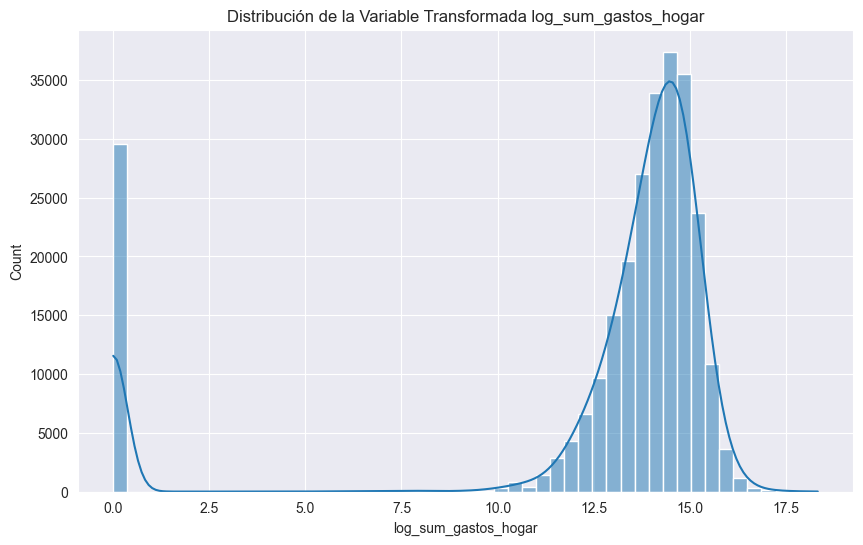

Matriz de Correlación con Variable Transformada:
                                  sum_gastos_hogar  \
sum_gastos_hogar                          1.000000   
max_nivel_educativo_en_hogar              0.151282   
alguien_hogar_empleado_o_similar          0.292638   
tot_hogares                              -0.098390   
num_cuartos_vivienda                      0.270021   
ind_tiene_energia                        -0.151840   
ind_tiene_alcantarillado                 -0.247196   
ind_tiene_gas                            -0.282686   
ind_tiene_acueducto                      -0.229032   
clasificacion_letter_cate                 0.177611   
cod_mpio                                  0.160707   
num_personas_hogar                        0.498893   
log_sum_gastos_hogar                      0.453667   

                                  max_nivel_educativo_en_hogar  \
sum_gastos_hogar                                      0.151282   
max_nivel_educativo_en_hogar                          1.000000

ValueError: Could not interpret value `log_sum_gastos_hogar` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [39]:


data_correlation['log_sum_gastos_hogar'] = np.log(data['sum_gastos_hogar'] + 1)  # +1 para evitar log(0)

# Graficar la distribución de la variable transformada
plt.figure(figsize=(10, 6))
sns.histplot(data_correlation['log_sum_gastos_hogar'], bins=50, kde=True)
plt.title('Distribución de la Variable Transformada log_sum_gastos_hogar')
plt.show()

# Calcular la matriz de correlación con la variable transformada
correlation_matrix = data_correlation.corr()
print("Matriz de Correlación con Variable Transformada:")
print(correlation_matrix)

# Reajustar el modelo de regresión lineal con la variable transformada
X = data_correlation[['clasificacion_letter_cate']]
y = data_correlation['log_sum_gastos_hogar']

# Añadir una constante al modelo (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

# Visualizar la relación entre 'log_sum_gastos_hogar' y 'clasificacion_letter'
plt.figure(figsize=(10, 6))
sns.boxplot(x='clasificacion_letter', y='log_sum_gastos_hogar', data=data)
plt.title('Relación entre Gastos del Hogar (Log Transformado) y Categoría Clasificada')
plt.xlabel('Categoría Clasificada')
plt.ylabel('Gastos del Hogar (Log Transformado)')
plt.show()

Al realizar la transformacion no existe correlacion signicativa entre las variables